MUHAMMAD DHONI APRIYADI --- SUBMISSION BELAJAR MACHINE LEARNING---

In [10]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [11]:
#import library 
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
#unduh dataset
!wget --no-check-certificate https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip -O rockpaperscissors.zip

--2021-04-29 10:08:36--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  1.28MB/s    in 4m 30s  

2021-04-29 10:13:07 (1.14 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [14]:
# melakukan ekstraksi pada file zip
import zipfile,os
import zipfile,os
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('rps')
zip_ref.close()

In [15]:
!pip install split_folders
import splitfolders
splitfolders.ratio('rps/rockpaperscissors/rps-cv-images', 'rps/rockpaperscissors/data', seed=1, ratio=(.6, .4))

Copying files: 2188 files [00:00, 4341.24 files/s]


In [16]:
import pandas as pd
base_dir = 'rps/rockpaperscissors/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
os.listdir('rps/rockpaperscissors/data/train')
os.listdir('rps/rockpaperscissors/data/val')

['scissors', 'rock', 'paper']

In [18]:
# membuat direktori bentuk tangan pada data training
train_rock_dir = os.path.join(train_dir, 'train')
train_scissors_dir = os.path.join(train_dir, 'scissors')
train_paper_dir = os.path.join(train_dir, 'paper')
 
# membuat direktori bentuk tangan pada data validasi
validation_crock_dir = os.path.join(validation_dir, 'rock')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
validation_paper_dir = os.path.join(validation_dir, 'paper')

In [19]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=20,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode = 'nearest')

val_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=20,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=20,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode = 'nearest')

In [39]:
train_generator = train_datagen.flow_from_directory(
  train_dir, 
  target_size=(150, 100),
  batch_size=32, 
  color_mode='rgb', 
  class_mode='categorical', 
  shuffle = True, 
  seed=1) 
validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(150, 100),
  batch_size=32,
  color_mode='rgb',
  class_mode='categorical',
  shuffle = True,
  seed=1)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')    
])

In [22]:
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 98, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 8, 128)        1

In [23]:
sample_train_images, _ = next(train_generator)
sample_val_images, _ = next(validation_generator)

In [24]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

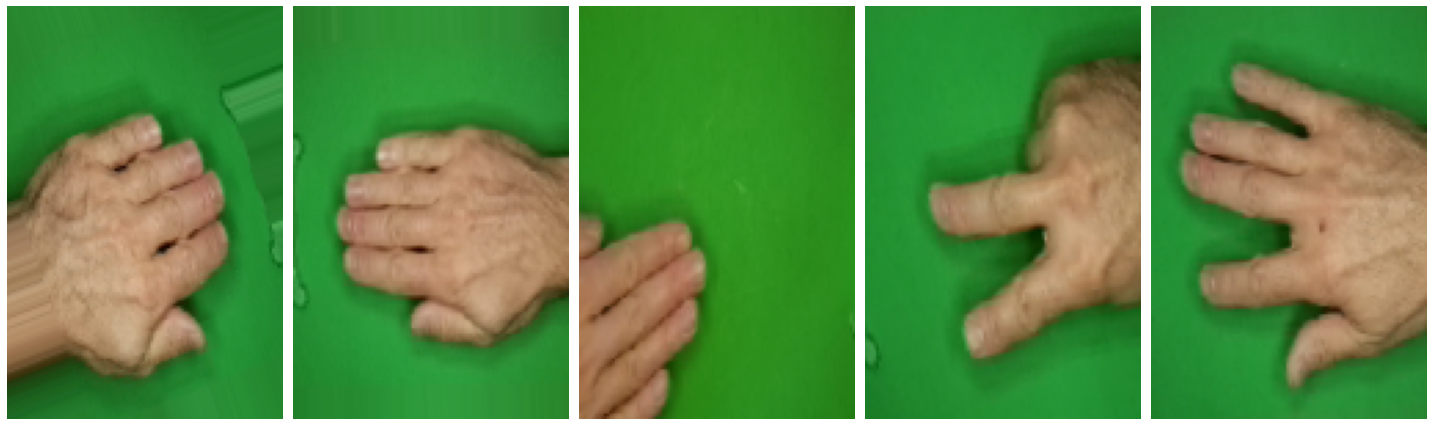

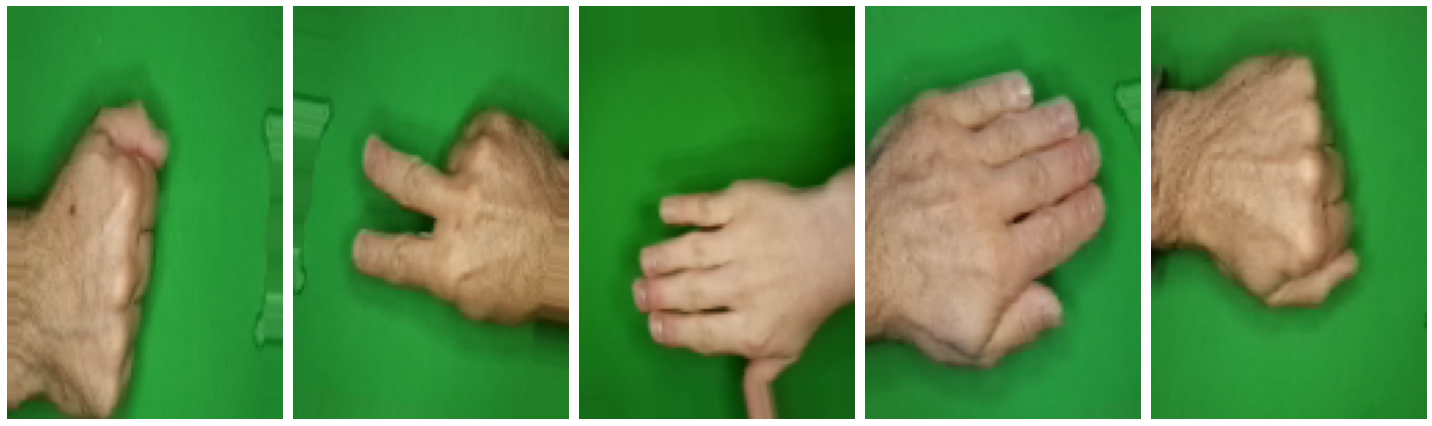

In [25]:
import matplotlib.pyplot as plt

plotImages(sample_train_images[:5])
plotImages(sample_val_images[:5])

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [27]:
model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2
)

Epoch 1/20
25/25 - 38s - loss: 1.1587 - accuracy: 0.3688 - val_loss: 1.0624 - val_accuracy: 0.5625
Epoch 2/20
25/25 - 5s - loss: 1.0051 - accuracy: 0.5375 - val_loss: 0.7828 - val_accuracy: 0.7812
Epoch 3/20
25/25 - 5s - loss: 0.6052 - accuracy: 0.7775 - val_loss: 0.3958 - val_accuracy: 0.8375
Epoch 4/20
25/25 - 5s - loss: 0.4140 - accuracy: 0.8425 - val_loss: 0.4791 - val_accuracy: 0.8625
Epoch 5/20
25/25 - 5s - loss: 0.3578 - accuracy: 0.8700 - val_loss: 0.3195 - val_accuracy: 0.8875
Epoch 6/20
25/25 - 5s - loss: 0.3798 - accuracy: 0.8750 - val_loss: 0.3203 - val_accuracy: 0.9187
Epoch 7/20
25/25 - 5s - loss: 0.3187 - accuracy: 0.8938 - val_loss: 0.2297 - val_accuracy: 0.9312
Epoch 8/20
25/25 - 5s - loss: 0.2469 - accuracy: 0.9050 - val_loss: 0.1714 - val_accuracy: 0.9312
Epoch 9/20
25/25 - 5s - loss: 0.2173 - accuracy: 0.9225 - val_loss: 0.1689 - val_accuracy: 0.9500
Epoch 10/20
25/25 - 5s - loss: 0.2091 - accuracy: 0.9337 - val_loss: 0.1224 - val_accuracy: 0.9563
Epoch 11/20
25/25 

Saving Batu.png to Batu.png
Batu.png
rock


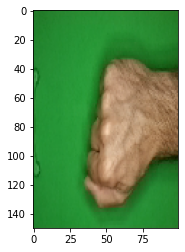

In [38]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')